# Ногорбеков Салим WIN-1-21 #
## LAB - 7 ##

In [2]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Задание №2</h3>

<h4> Создаем свой «мешок слов», набор из 30 отзывов о фильме "Хроники Нарнии". Все отзывы исключительно на английском языке, по 10 негативных и позитивный в train, а также по 5 негативных и положительных отзывов в test. </h4>

In [3]:
reviews_train_eng = load_files('reviews/train/')
reviews_test_eng = load_files('reviews/test/')


text_train_eng = [item.decode('utf-8') for item in reviews_train_eng.data]
y_train_eng = reviews_train_eng.target

text_test_eng = [item.decode('utf-8') for item in reviews_test_eng.data]
y_test_eng = reviews_test_eng.target

<h4> Создаем список стоп-слов и преобразуем обучающие текстовые данные в матрицу документ-термин

In [4]:
stop_words = list(ENGLISH_STOP_WORDS)
count_vectorizer_eng = CountVectorizer(stop_words=stop_words)
X_train_eng = count_vectorizer_eng.fit_transform(text_train_eng)

<h4>Размерность мешка слов</h4>

In [5]:
print('{}'.format(X_train_eng.shape))

(20, 984)


<h4>Исследуем признаки</h4>

In [35]:
feature_names_eng = count_vectorizer_eng.get_feature_names_out()

<h4>Выведем первые 10 признаков</h4>

In [36]:
print(feature_names_eng[:10])

['11' '2000s' '2005' '26' '35' '38' '55' 'absolutely' 'accompanied'
 'acting']


<h4>Выведем последние 10 признаков</h4>

In [37]:
print(feature_names_eng[-10:])

['worth' 'written' 'wrote' 'ww' 'wwii' 'year' 'young' 'younger' 'youngest'
 'zinger']


<h3>Задание №3</h3>

<h4>Создаем словарь стоп-слов и применяем к своему «мешку слов»

In [6]:
count_vectorizer_eng = CountVectorizer(stop_words='english')
count_vectorizer_eng.fit(text_train_eng)

X_train_eng = count_vectorizer_eng.transform(text_train_eng)

print('Размерность мешка слов: {}'.format(X_train_eng.shape))

Размерность мешка слов: (20, 984)


<h3>Задание №4</h3>

<h4> Масштабируем данные с помощью tf-idf

In [39]:
pipe = make_pipeline(TfidfVectorizer(norm=None), LogisticRegression())

# Параметры для логистической регрессии
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__max_iter': [10000, 20000, 30000],
    
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

grid_search_eng = GridSearchCV(pipe, param_grid, cv=4)
grid_search_eng.fit(text_train_eng, y_train_eng)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(norm=None)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                   100.0],
                         'logisticregression__max_iter': [10000, 20000, 30000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga'],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [41]:
print('Лучший результат: {}'.format(grid_search_eng.best_score_))
print('Лучшие параметры: {}'.format(grid_search_eng.best_params_))

Лучший результат: 0.8
Лучшие параметры: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'tfidfvectorizer__ngram_range': (1, 2)}


<h3>Задание №5</h3>

<h4> Исследуем коэффициенты модели

<h4>Отобразим признаки с наименьшими коэффицентами</h4>

In [42]:
tfidf_vectorizer = grid_search_eng.best_estimator_.named_steps['tfidfvectorizer']
logistic_regression = grid_search_eng.best_estimator_.named_steps['logisticregression']

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = logistic_regression.coef_.flatten()

features_df = pd.DataFrame({'Feature': feature_names, 'Value': coefficients})

print(features_df.sort_values(by='Value', ascending=False).tail(20))

                   Feature     Value
3466                 using -0.242626
1189                 films -0.244828
1366                  good -0.266527
1861                  less -0.273488
2103     much disappointed -0.275388
2256  old superimpositions -0.277886
3692          yet cautious -0.308481
2545                really -0.373003
3237                though -0.384313
3239            though the -0.499147
2468                pretty -0.509811
2653            scope gets -0.520339
3691                   yet -0.528911
3538                    we -0.555211
622                    cgi -0.570250
1086                  exit -0.578374
3314            to suggest -0.579137
2894               suggest -0.592786
898                   does -0.740400
1155                 feels -0.882727


<h4>Отобразим признаки с наибольшими коэффицентами</h4>

In [43]:
tfidf_vectorizer = grid_search_eng.best_estimator_.named_steps['tfidfvectorizer']
logistic_regression = grid_search_eng.best_estimator_.named_steps['logisticregression']

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = logistic_regression.coef_.flatten()

features_df = pd.DataFrame({'Feature': feature_names, 'Value': coefficients})

print(features_df.sort_values(by='Value', ascending=False).head(20))

                   Feature     Value
445                    big  1.233087
2231              of other  0.860190
1914              literate  0.658392
176           and literate  0.579835
1276             franchise  0.560264
2193          occasionally  0.510610
116                     an  0.493639
2349               package  0.468790
2482     production values  0.435150
1124               fantasy  0.325293
3468                values  0.316754
1011             enjoyable  0.300179
447               big look  0.290433
1367           good enough  0.240906
904                  doesn  0.231817
1988               manages  0.224601
2302                 other  0.198157
1729                 it is  0.178644
1012  enjoyable adaptation  0.163159
1247                for us  0.146737


<h4>Создадим теплокарту для результатов поиска по сетке и усредненной правильности перекрестной проверки</h4>

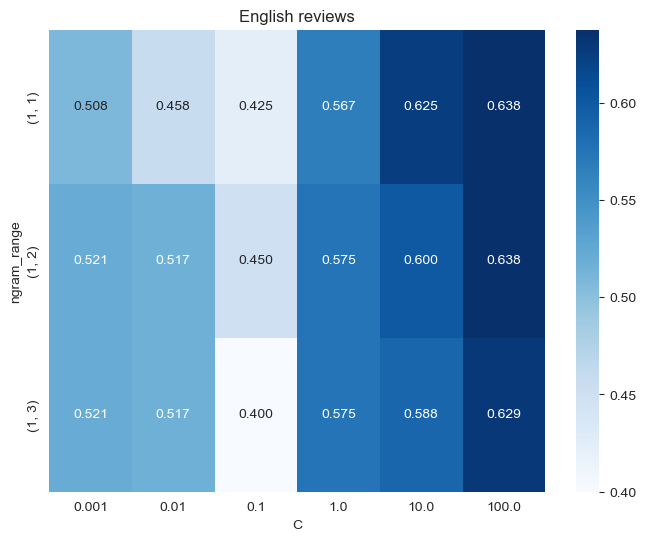

In [46]:
results_eng = pd.DataFrame(grid_search_eng.cv_results_)

import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data_eng = results_eng.pivot_table(index='param_tfidfvectorizer__ngram_range',
                                           columns='param_logisticregression__C',
                                           values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_eng, annot=True, fmt=".3f", cmap="Blues")
plt.title('English reviews')
plt.xlabel('C')
plt.ylabel('ngram_range')

plt.show()


<h4>Отчет</h4>

In [45]:
prediction_eng = grid_search_eng.best_estimator_.predict(text_test_eng)

print(classification_report(y_test_eng, prediction_eng, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.75      0.75      0.75         4

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



<h3>Задание №6</h3>

<h4> Вывод

<p> Итак, отчет показал нам точность в 67% правильно угаданных отрицательных отзывов, а также в 75 % угаданных положительных. В целом модель показала хороший результат, вероятнее всего это связано с количеством отзывов, так как мы взяли 30, а некоторые отзывы содержали большое количество слов. Но если мы посмотрим на признаки наибольших коэффицентов, то увидим не совсем информативный список слов, по которым довольно сложно определить тип отзывов. Модель верно угадала 3 из 5 отрицательных отзывов и 4 из 5 положительных. И хоть результат вполне сносный его определенно можно улучшить посредством увеличения мешка слов и отзывов.